# Pendahuluan

Bahasa Isyarat Indonesia (BSINDO) adalah bahasa isyarat yang memiliki sifat linguistik yang sama dengan bahasa lisan, dengan tata bahasa yang berbeda dari bahasa Inggris. BSINDO diekspresikan dengan gerakan tangan dan wajah. Ini adalah bahasa utama yang banyak digunakan oleh orang Indonesia yang tuli dan sulit mendengar. Data yang digunakan adalah data primer yang menggunakan library open-cv untuk menangkap foto tangan berdasarkan bentuk yang melambangkan huruf-huruf bahasa isyarat Indonesia. library cvzone digunakan untuk melakukan mapping skeleton struktur jari-jari tangan agar memudahkan model untuk membedakan karakteristik antar huruf yang mana dapat meng-improve akurasi model. Label terdiri dari huruf A-Z yang direpresentasikan dengan notasi angka.

![image.jpeg](src\bsindo.jpeg)


In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
import string


In [4]:
class CONFIG:
    TRAIN_PATH = "./DATA_TRAIN_TEST/train/train2.csv"
    TEST_PATH = "./DATA_TRAIN_TEST/val/test2.csv"


class Colors:
    LightGray = "#fafafa"
    Teal = "#008080"
    DarkGray = "#464144"


In [5]:
train_df = pd.read_csv(CONFIG.TRAIN_PATH)
test_df = pd.read_csv(CONFIG.TEST_PATH)

In [6]:
test = test_df
y = test["label"]

In [7]:
train_df

,Unnamed: 0,label,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,...,pixels_4087,pixels_4088,pixels_4089,pixels_4090,pixels_4091,pixels_4092,pixels_4093,pixels_4094,pixels_4095,pixels_4096
0,0,1,128,128,128,128,128,128,128,129,...,128,128,128,128,128,128,128,128,128,130
1,1,1,253,104,105,105,105,105,105,104,...,221,221,221,221,221,221,221,223,222,255
2,2,1,253,104,105,105,105,105,105,106,...,221,221,221,221,221,221,221,223,222,255
3,3,1,253,104,105,105,105,105,105,105,...,221,221,221,221,221,221,221,223,222,255
4,4,1,103,104,106,106,106,106,106,105,...,221,221,221,221,221,221,221,221,221,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43246,43246,9,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
43247,43247,9,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
43248,43248,9,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
43249,43249,9,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [8]:
train_df.columns

Index(['Unnamed: 0', 'label', 'pixels_1', 'pixels_2', 'pixels_3', 'pixels_4',
       'pixels_5', 'pixels_6', 'pixels_7', 'pixels_8',
       ...
       'pixels_4087', 'pixels_4088', 'pixels_4089', 'pixels_4090',
       'pixels_4091', 'pixels_4092', 'pixels_4093', 'pixels_4094',
       'pixels_4095', 'pixels_4096'],
      dtype='object', length=4098)

In [9]:
del train_df['Unnamed: 0']
del test_df['Unnamed: 0']

# Data Visualization


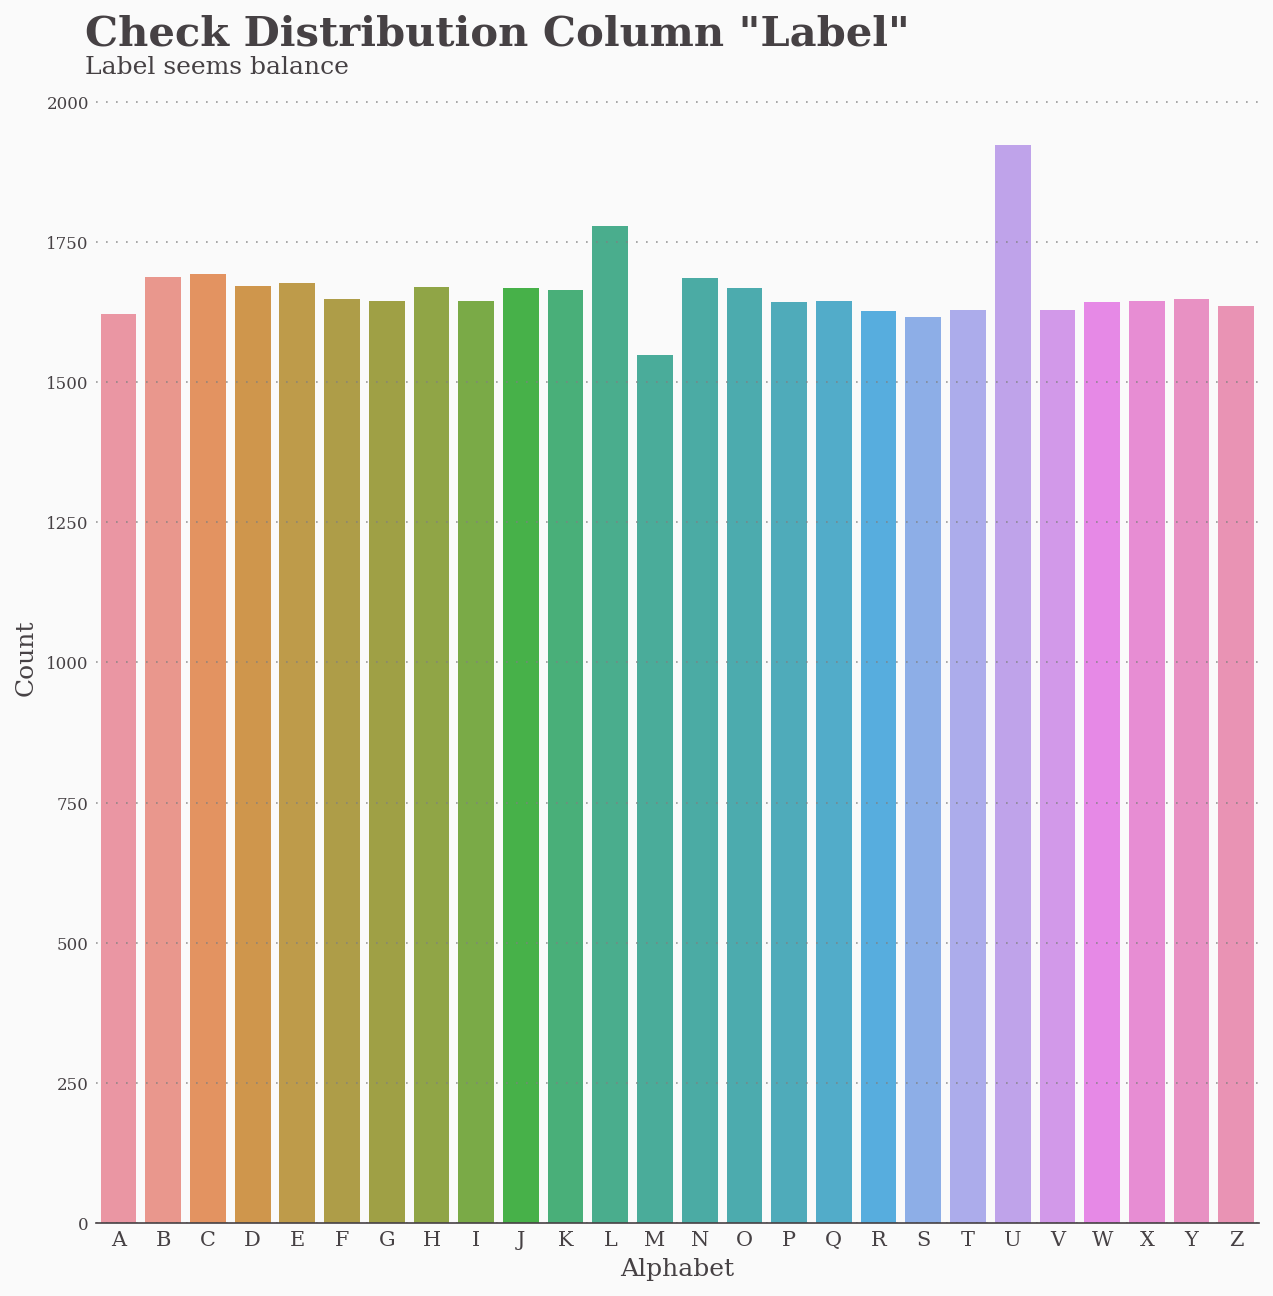

In [10]:
alphabet = list(string.ascii_uppercase)
# alphabet.remove("J")
# alphabet.remove("Z")

fig = plt.figure(figsize=(10, 10), dpi=150, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)
# setup axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)
sns.countplot(
    data=train_df,
    x="label",
    ax=ax0,
)

# plot setting
ax0.set_xticklabels(
    labels=list(alphabet),
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Alphabet", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)


# text
ax0.text(
    -0.75,
    2100,
    'Check Distribution Column "Label"',
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    -0.75,
    2050,
    "Label seems balance",
    fontfamily="serif",
    fontsize=12,
    fontweight="normal",
    color=Colors.DarkGray,
)

plt.show()


In [ ]:
# for i in alphabet:
#     path_abjad = os.listdir('DATA_TRAIN_TEST/train/{i}')
#     print(i,":",len(path_abjad))

In [11]:
test_df

,label,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,...,pixels_4087,pixels_4088,pixels_4089,pixels_4090,pixels_4091,pixels_4092,pixels_4093,pixels_4094,pixels_4095,pixels_4096
0,1,128,128,128,128,128,128,128,129,128,...,128,128,128,128,128,128,128,128,128,130
1,1,253,104,105,105,105,105,105,104,105,...,221,221,221,221,221,221,221,223,222,255
2,1,253,104,105,105,105,105,105,106,104,...,221,221,221,221,221,221,221,223,222,255
3,1,253,104,105,105,105,105,105,105,105,...,221,221,221,221,221,221,221,223,222,255
4,1,103,104,106,106,106,106,106,105,105,...,221,221,221,221,221,221,221,221,221,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43246,9,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
43247,9,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
43248,9,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
43249,9,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


# Data Preprocessing


In [12]:
y_train = train_df["label"]
y_test = test_df["label"]
del train_df["label"]
del test_df["label"]

In [13]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)


In [14]:
x_train = train_df.values
x_test = test_df.values


In [15]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255


In [53]:
# # Reshaping the data from 1-D to 3-D as required through input by CNN's
# x_train = x_train.flatten()
# x_test = x_test.flatten()

In [16]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1, 64, 64, 1)
x_test = x_test.reshape(-1, 64, 64, 1)

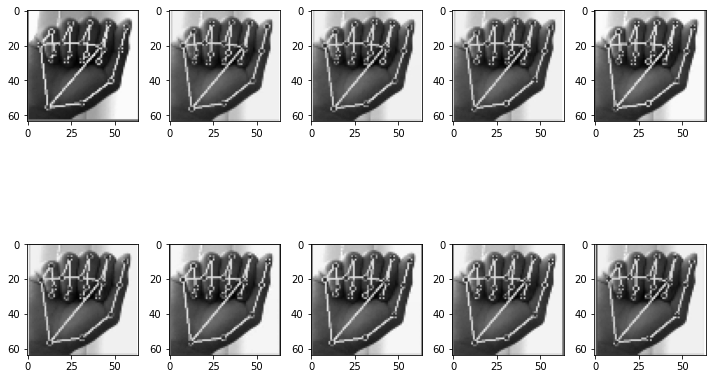

In [17]:
f, ax = plt.subplots(2, 5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x_train[k].reshape(64, 64), cmap="gist_gray")
        k += 1
    plt.tight_layout()


# Data Augmentation


In [18]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,
)  # randomly flip images


datagen.fit(x_train)


# Training Model


In [19]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_accuracy", patience=2, verbose=1, factor=0.5, min_lr=0.00001
)


In [20]:
model = Sequential()
model.add(
    Conv2D(
        75,
        (3, 3),
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(64, 64, 1),
    )
)
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=26, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 32, 32, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 50)       2

In [21]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[learning_rate_reduction],
)

Epoch 1/20
338/338 [==============================] - 327s 962ms/step - loss: 0.2883 - accuracy: 0.9081 - val_loss: 11.1564 - val_accuracy: 0.0653 - lr: 0.0010
Epoch 2/20
338/338 [==============================] - 337s 998ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0366 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 3/20
338/338 [==============================] - 334s 988ms/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0023 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 4/20
338/338 [==============================] - 333s 986ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0266 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 5/20
338/338 [==============================] - 319s 945ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0026 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 6/20
338/338 [==============================] - 323s 957ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0036 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 7/20
338/338 [=========================

In [22]:
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, "%")


1352/1352 [==============================] - 51s 38ms/step - loss: 2.0180e-04 - accuracy: 0.9999
Accuracy of the model is -  99.99306201934814 %


# Model Analysis


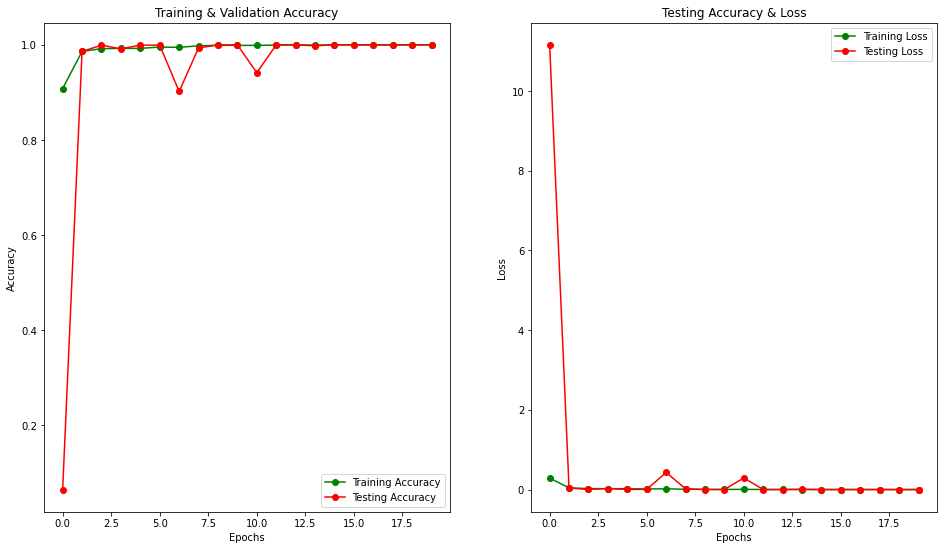

In [24]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(16, 9)

ax[0].plot(epochs, train_acc, "go-", label="Training Accuracy")
ax[0].plot(epochs, val_acc, "ro-", label="Testing Accuracy")
ax[0].set_title("Training & Validation Accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "g-o", label="Training Loss")
ax[1].plot(epochs, val_loss, "r-o", label="Testing Loss")
ax[1].set_title("Testing Accuracy & Loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


In [26]:
import numpy as np
predictions = np.argmax(model.predict(x_test), axis=1)
for i in range(len(predictions)):
    predictions[i] += 1

    if predictions[i] >= 10:
        predictions[i] += 1


1352/1352 [==============================] - 52s 38ms/step


In [32]:
class_name = [f"Class {i}" for i in np.unique(predictions)]
print(classification_report(y, predictions, target_names=class_name))


ValueError: Number of classes, 27, does not match size of target_names, 26. Try specifying the labels parameter

In [34]:
cm = confusion_matrix(y, predictions)


In [52]:
cm = pd.DataFrame(
    cm,
    index=[i for i in range(1, 26) if i != 10],
    columns=[i for i in range(1, 26) if i != 10],
)


<AxesSubplot:>

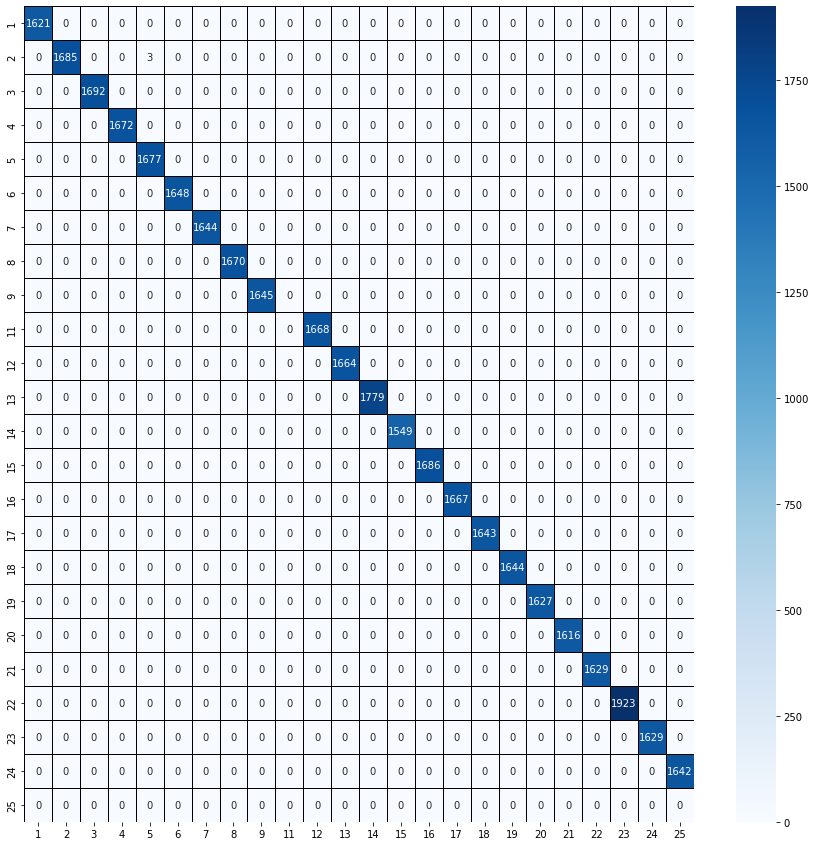

In [53]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, cmap="Blues", linecolor="black", linewidth=1, annot=True, fmt="")


# Visualize Predict Data


In [39]:
def mapper_alphabet():
    nums = [i for i in range(1, 26) if i != 10]
    alphabet = list(string.ascii_uppercase)
    alphabet.remove("J")
    alphabet.remove("Z")

    mapper = {}
    for num, alpha in zip(nums, alphabet):
        mapper[num] = alpha

    return mapper


In [40]:
df_pred_test = pd.DataFrame({"y_pred": predictions, "y_test": y})

df_pred_test["correct"] = np.where(
    df_pred_test["y_pred"] == df_pred_test["y_test"], True, False
)

df_pred_test["y_pred"] = df_pred_test["y_pred"].map(mapper_alphabet())
df_pred_test["y_test"] = df_pred_test["y_test"].map(mapper_alphabet())

shuffle(df_pred_test).head()


,y_pred,y_test,correct
16049,S,R,False
41711,I,I,True
5747,M,L,False
31343,NaN,NaN,False
23461,W,V,False


## Correct


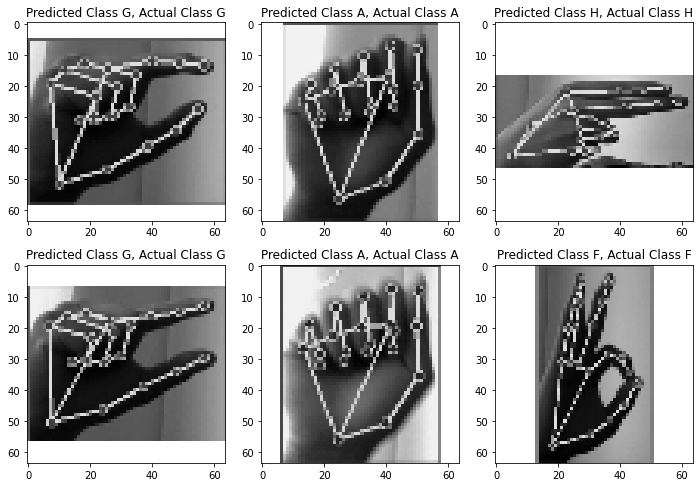

In [41]:
correct = df_pred_test.query("correct == True")

plt.figure(figsize=(10, 10))
i = 0
for c in shuffle(correct).index[:6]:
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[c].reshape(64, 64), cmap="gray", interpolation="none")
    plt.title(
        "Predicted Class {}, Actual Class {}".format(
            correct["y_pred"][c], correct["y_test"][c]
        ),
        fontsize=12,
    )
    plt.tight_layout()
    i += 1


## Not Correct


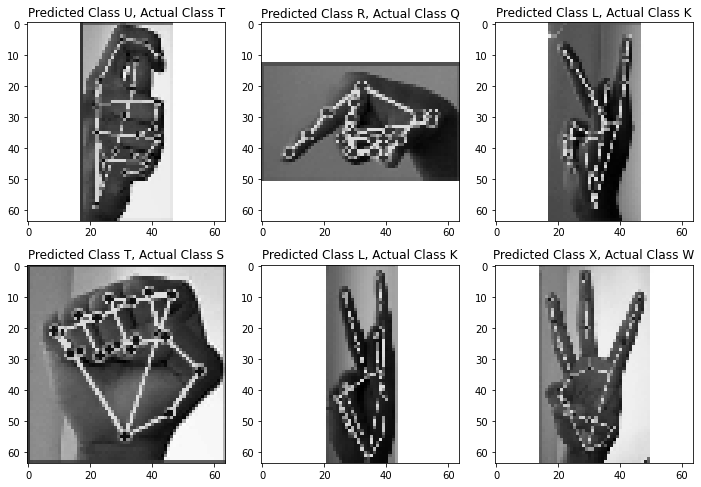

In [42]:
not_correct = df_pred_test.query("correct == False")

plt.figure(figsize=(10, 10))
i = 0
for c in shuffle(not_correct).index[:6]:
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[c].reshape(64, 64), cmap="gray", interpolation="none")
    plt.title(
        "Predicted Class {}, Actual Class {}".format(
            not_correct["y_pred"][c], not_correct["y_test"][c]
        ),
        fontsize=12,
    )
    plt.tight_layout()
    i += 1


# Thank You

In [64]:
# Save as a model dedicated to inference
model_save_path='model/keypoint_classifier/model1.hdf5'
model.save(model_save_path, include_optimizer=False)

In [65]:
# Transform model (quantization)
import tensorflow as tf
tflite_save_path = 'model/keypoint_classifier/model1.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)


INFO:tensorflow:Assets written to: C:\Users\rezae\AppData\Local\Temp\tmpoi5gc20b\assets


INFO:tensorflow:Assets written to: C:\Users\rezae\AppData\Local\Temp\tmpoi5gc20b\assets


891136

# Inference test

In [45]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [46]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [51]:
# interpreter.set_tensor(input_details[0]['index'], np.array([x_test[0]]))

In [49]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 109 ms
Wall time: 193 ms


In [50]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.79887976e-09 9.33440219e-07 1.42158281e-16 8.53045516e-20
 1.38276642e-19 1.11724837e-16 4.30089894e-21 1.25687090e-15
 1.30097755e-11 5.18536991e-10 3.60095986e-13 2.38636900e-15
 4.37394247e-23 1.19361607e-19 1.46597924e-19 1.28283513e-14
 9.99999046e-01 2.04190991e-22 5.40916861e-20 2.66595783e-22
 2.06314148e-17 1.82456566e-19 3.30373765e-18 1.78840023e-21
 1.17702573e-13 3.65830427e-23]
16
